In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [7]:
beer = pd.read_csv('../../datasets/lager_antioxidant_reg.csv')
beer.head()

,beer,tpc,ma,dsa,asa,orac,rp,mca
0,1,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,2,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,3,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,4,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,5,146.03,11.72,0.64,0.90,3.18,0.47,9.39


# Regresión Líneal

In [8]:
x_columns = [col for col in beer.columns.values if col != 'tpc']
X = beer[x_columns]
y = beer.tpc

In [9]:
# instanciamos el modelo
beer_model = linear_model.LinearRegression()

In [10]:
# entrenamos el modelo
beer_model.fit(X, y)

LinearRegression()

In [11]:
# imprimimos los coeficientes del modelo
beer_model.intercept_

18.830383913147955

In [12]:
beer_model.coef_

array([ 5.84731786e-02,  1.28827809e+00,  1.27650959e+02, -6.14737240e-01,
       -1.09375291e+00,  7.35403422e+01,  3.76892085e-01])

In [13]:
# Score regresa el coeficiente de determinación o r cuadrada
# este número nos dce que proporción de variación en la data es explicado por el modelo
beer_model.score(X, y)

0.8219280156188544

In [15]:
from yellowbrick.regressor import ResidualsPlot

0.8219280156188544

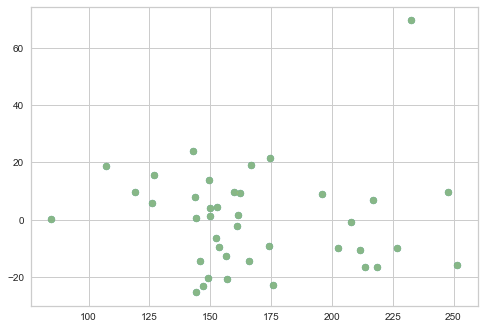

In [17]:
visualizer = ResidualsPlot(beer_model, hist=False)
visualizer.fit(X, y) # llenar con los datos de entrenamiento el modelo
visualizer.score(X, y)

In [18]:
import statsmodels.api as sm

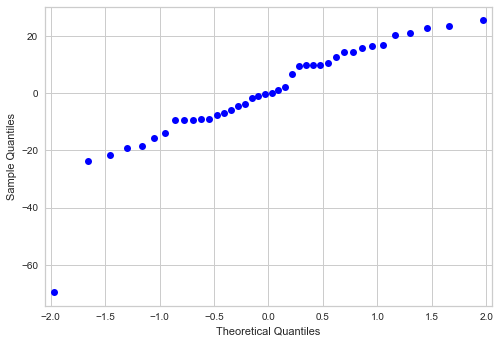

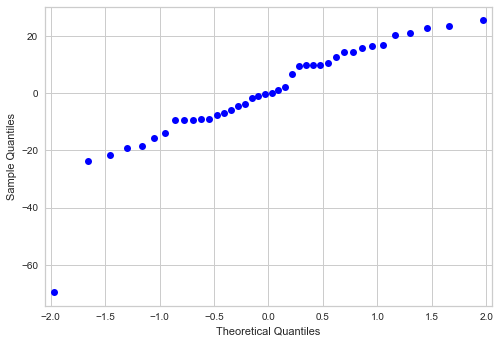

In [19]:
predictions = beer_model.predict(X)
residuals = y - predictions
sm.qqplot(residuals)

In [ ]:
# dado que tenemos una relación lineal podemos suponer que los residuos se distribuyen normalmanete.

# Regresión Logistica

In [33]:
from sklearn.linear_model import LogisticRegression

In [21]:
titanic = pd.read_csv("../../datasets/titanic.csv")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [22]:
titanic.isnull().sum(axis=0)

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [23]:
# eliminando columnas que no aportan al modelo
titanic_drop = titanic.drop(columns=['cabin','name','home.dest','body','boat','ticket'])
titanic_drop.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


In [24]:
# el siguiente paso es eliminar los registros que contengan al menos un NAN
titanic_missing = titanic_drop.dropna()
titanic_missing

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...,...
1301,3,0,male,45.5000,0,0,7.2250,C
1304,3,0,female,14.5000,1,0,14.4542,C
1306,3,0,male,26.5000,0,0,7.2250,C
1307,3,0,male,27.0000,0,0,7.2250,C


In [27]:
titanic_missing.isna().sum()
titanic_missing.shape

(1043, 8)

In [28]:
# Creando variables ficticias pra las columnas categoricas
titanic_with_dummies = pd.get_dummies(titanic_missing, columns=['pclass','sex','embarked'])
titanic_with_dummies

,survived,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,29.0000,0,0,211.3375,1,0,0,1,0,0,0,1
1,1,0.9167,1,2,151.5500,1,0,0,0,1,0,0,1
2,0,2.0000,1,2,151.5500,1,0,0,1,0,0,0,1
3,0,30.0000,1,2,151.5500,1,0,0,0,1,0,0,1
4,0,25.0000,1,2,151.5500,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,0,45.5000,0,0,7.2250,0,0,1,0,1,1,0,0
1304,0,14.5000,1,0,14.4542,0,0,1,1,0,1,0,0
1306,0,26.5000,0,0,7.2250,0,0,1,0,1,1,0,0
1307,0,27.0000,0,0,7.2250,0,0,1,0,1,1,0,0


In [31]:
x_columns = [col for col in titanic_with_dummies.columns.values if col != 'survived']
X = titanic_with_dummies[x_columns]
y = titanic_with_dummies.survived

In [39]:
titanic_model = LogisticRegression(max_iter=1000)
titanic_model.fit(X, y)
titanic_model.score(X, y)

0.7919463087248322

In [40]:
# nuestro modelo predice al 80% de la variación de los datos.

## Grafica de Curva ROC
###  la curva ROC es un gráfico que indica que tan bien trabaja elmodelo

In [41]:
from sklearn import metrics
import matplotlib.pyplot as plt

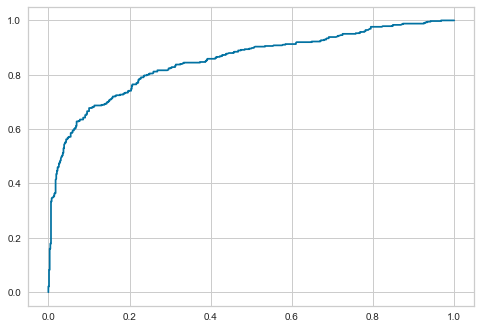

In [43]:
y_pred_proba = titanic_model.predict_proba(X)[::,1]
fpr, tpr, _ = metrics.roc_curve(y, y_pred_proba)
auc = metrics.roc_auc_score(y, y_pred_proba)
plt.plot(fpr, tpr)

In [44]:
# podemos ver que el área bajo la curva es mayor que ladiagonal x=y
# de hecho lo hemos calulado por encima del 0.85
auc

0.8506301161241195